In [3]:
import pandas as pd
import numpy as np
import seaborn
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
buffalo_s = pd.read_csv("celeba_buffalo_s.csv")
buffalo_l = pd.read_csv("celeba_buffalo_l.csv")

In [5]:


embedding_names = []
for i in range(512):
    embedding_names.append("embedding_"+str(i))
    
buffalo_s_embed = buffalo_s[embedding_names]
buffalo_s_label = buffalo_s.drop(embedding_names, axis=1)

buffalo_l_embed = buffalo_l[embedding_names]
buffalo_l_label = buffalo_l.drop(embedding_names, axis=1)

In [6]:
np.sum(np.sum(buffalo_l_label.isna()))

/usr/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


0

In [7]:
buffalo_l_label

,image_name,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,id
0,000001.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,2880
1,000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,1,5805
2,000006.jpg,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,1,-1,1,-1,-1,1,4153
3,000008.jpg,1,1,1,-1,-1,1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,6369
4,000018.jpg,-1,1,-1,-1,-1,-1,1,-1,1,...,1,-1,1,1,-1,1,1,-1,-1,2464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30007,202551.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,1,-1,-1,1,-1,-1,1,-1,1,5224
30008,202559.jpg,-1,1,-1,-1,1,1,-1,-1,-1,...,1,-1,1,-1,-1,1,1,-1,-1,5768
30009,202562.jpg,-1,-1,-1,-1,1,-1,-1,-1,-1,...,1,-1,1,1,-1,1,1,-1,1,5325
30010,202576.jpg,-1,1,-1,-1,-1,1,-1,-1,1,...,-1,1,-1,-1,-1,1,1,-1,1,5471


In [8]:
np.sum(np.sum(buffalo_l_embed.isna()))

/usr/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


0

In [9]:
buffalo_l_embed

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_502,embedding_503,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511
0,1.441545,2.393396,-1.003623,0.122308,1.842565,-1.090654,0.968768,-0.160028,-1.140183,-0.803360,...,0.657348,-1.484989,-0.136410,-1.090225,-1.596338,-0.110376,0.900254,0.341207,0.462908,-0.673743
1,-0.513956,-0.054110,-0.041697,1.244457,-0.930742,0.030254,0.491898,1.462660,-0.067617,0.403593,...,0.935361,-0.510537,1.625798,0.871837,2.200004,0.998827,-0.397962,0.390829,0.194029,0.992391
2,1.075346,0.380185,0.436007,-0.507009,-0.696099,1.786359,-1.040563,-0.498421,-0.720458,-0.333438,...,-1.637391,-0.645637,0.012643,-0.320423,-0.697942,-1.986939,1.115830,-1.022141,0.347849,-0.710683
3,-1.108241,1.665860,0.904464,-1.106271,-1.015055,0.256345,-0.403926,-0.500956,1.580117,-0.811156,...,0.939887,0.983840,1.101034,0.255945,-0.935750,-1.363179,-0.894348,-0.651322,0.674887,-1.069576
4,0.472541,1.206789,0.675895,0.052689,0.906199,0.981983,1.308634,1.814266,0.228123,-0.133187,...,0.562390,-0.168269,0.474727,1.060535,-0.073372,-0.600600,0.203963,0.013085,0.170634,-0.035556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30007,-1.027609,0.038051,0.678272,-0.681806,-0.403177,-0.697944,-0.852238,-0.924309,-0.033749,-1.113889,...,0.687267,0.585606,-1.839872,-1.158070,-1.340626,0.191280,-0.838924,1.343969,0.039965,0.085690
30008,-1.075066,0.667526,-0.520191,0.316831,0.578368,-1.846013,0.937127,-0.874951,-1.410228,0.426055,...,-1.628014,0.137390,1.368412,0.890583,-0.214811,1.125041,0.344662,0.062554,-0.456123,-0.207488
30009,-0.755745,0.685346,-0.054518,0.747713,0.050222,0.312256,1.024764,-0.069925,0.290415,-0.240367,...,1.086413,0.375387,0.951661,-0.471971,-0.000432,-1.310920,0.981951,-0.705259,-0.012826,-2.372355
30010,-0.876157,-0.433229,0.477012,1.509275,-0.158951,0.468560,-0.504834,0.589195,-0.569086,-0.628213,...,0.382717,-0.364226,1.077819,0.140129,-1.189182,0.159892,0.006826,-1.023947,1.163164,1.535108


In [10]:
indices1 = buffalo_l_label["Blurry"]==1
v1 = np.sum(buffalo_l_embed[indices1])

/usr/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [11]:
indices0 = buffalo_l_label["Blurry"]==-1
v2 = np.sum(buffalo_l_embed[indices0])

In [12]:
V = np.matrix([v1, v2])
projection = np.linalg.inv(V@V.T)@V@buffalo_l_embed.T

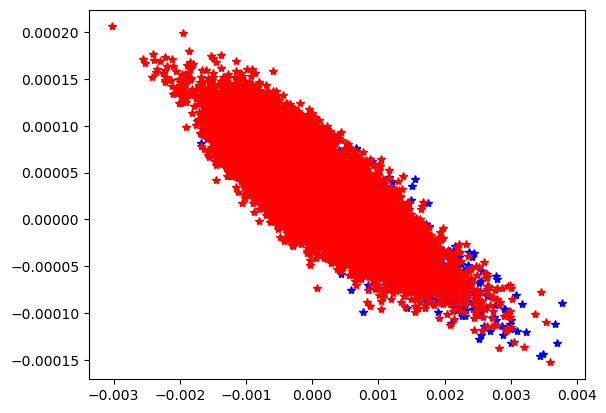

In [13]:
for i in range(len(indices1)):
    if indices1[i]:
        plt.plot(projection[i][0], projection[i][1], '*', color='b')

for i in range(len(indices0)):
    if indices0[i]:
        plt.plot(projection[i][0], projection[i][1], '*', color='r')


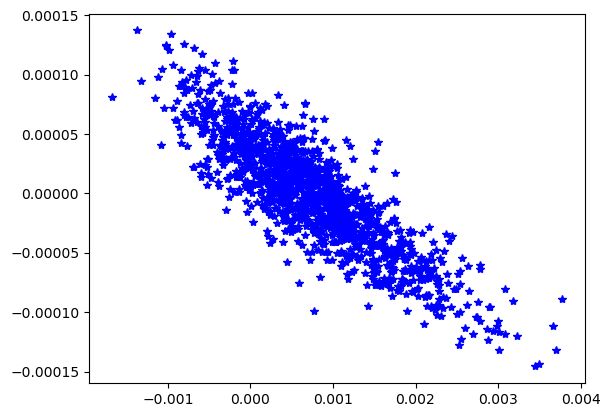

In [14]:
for i in range(len(indices1)):
    if indices1[i]:
        plt.plot(projection[i][0], projection[i][1], '*', color='b')

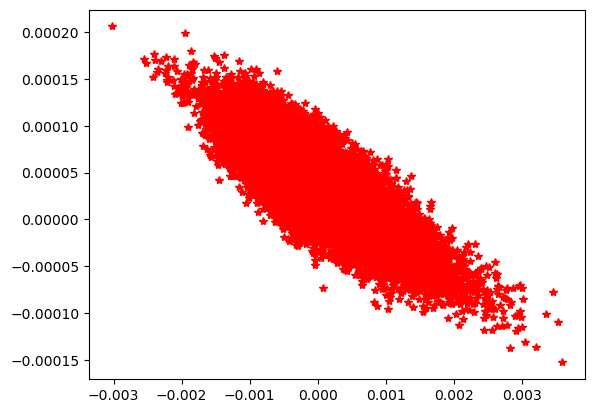

In [15]:
for i in range(len(indices0)):
    if indices0[i]:
        plt.plot(projection[i][0], projection[i][1], '*', color='r')

In [16]:
#cosine similarity
def cos_sim(v1, v2):
    return (v1.T@v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [17]:
vector_set = {}
for label in buffalo_l_label.columns.drop(["image_name", "id"]):

    indices_true = buffalo_l_label[label]==1
    vt = np.sum(buffalo_l_embed[indices_true])

    indices_false = buffalo_l_label[label]==-1
    vf = np.sum(buffalo_l_embed[indices_false])

    vector_set[label] = [vt, vf]
    

/usr/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [18]:
label_names = buffalo_l_label.columns.drop(["image_name", "id"])
i=0
for label1 in label_names:
    for j in range(len(label_names)):
        if j>i:
            label2 = label_names[j]
            sim = cos_sim(vector_set[label1][0], vector_set[label2][0])
            if sim<0.17:
                print(label1)
                print(label2)
                print()
    i+=1



Bald
Bangs

Bald
Blond_Hair

Bald
Brown_Hair

Bald
Heavy_Makeup

Bald
Rosy_Cheeks

Bald
Wavy_Hair



In [19]:
mean_v = np.asarray(np.sum(buffalo_l_embed)) 

maxim = 0
argmax = 0
for i in buffalo_l_embed.T:
    # print(i/30012)
    sim = cos_sim(mean_v, np.asarray(buffalo_l_embed.T[i]))
    if sim>.33:
        print(i)



/usr/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


6595
7417
14226
19157
21841


In [20]:
buffalo_l.T[7417]

image_name          049929.jpg
5_o_Clock_Shadow            -1
Arched_Eyebrows              1
Bags_Under_Eyes             -1
Bald                        -1
                       ...    
embedding_508         0.036579
embedding_509         0.354835
embedding_510         1.660201
embedding_511        -0.470032
id                        5938
Name: 7417, Length: 553, dtype: object

In [21]:
different_poeple=buffalo_l_label["id"].unique()

poeple_embed = {}
for person in different_poeple:
    indices = buffalo_l_label["id"]==person
    poeple_embed[person] = np.sum(buffalo_l_embed[indices])




/usr/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [35]:
sim_matrix = {}
for i in poeple_embed:
    sim_matrix[i] = {}
    for j in poeple_embed:
            sim_matrix[i][j] = np.abs(cos_sim(poeple_embed[i], poeple_embed[j]))

In [41]:
most_similar_list = {}
for i in sim_matrix:
    most_similar = 0
    sim = 0
    for j in sim_matrix[i]:
        if i!=j:
            if sim_matrix[i][j] > sim:
                sim = sim_matrix[i][j]
                most_similar = j
    most_similar_list[i] = (most_similar, sim)


In [42]:
most_similar_list

{2880: (1565, 0.292726987371849),
 5805: (6183, 0.2771279258493844),
 4153: (2253, 0.23127811891218455),
 6369: (1228, 0.23124641319519876),
 2464: (4119, 0.2764524867629474),
 1603: (4126, 0.23353945038038273),
 5512: (4460, 0.25824126727211133),
 4407: (6334, 0.2548608741663548),
 5239: (5688, 0.2742011776258675),
 4125: (6194, 0.3219785274917833),
 6318: (4110, 0.2671520676577293),
 4310: (1326, 0.29867441725004096),
 1446: (10130, 0.17170840423089176),
 10144: (6324, 0.27960352840745206),
 2879: (4669, 0.358341382990696),
 6204: (1908, 0.26254824049230807),
 1499: (4670, 0.2468749039733317),
 5127: (4150, 0.23555210491326967),
 6145: (1305, 0.2395080673243156),
 5578: (5291, 0.2702151346330967),
 5472: (10160, 0.2182280044732553),
 4262: (5928, 0.2918350197696157),
 4323: (4326, 0.2380127819985718),
 1946: (5960, 0.403411863568194),
 5794: (4027, 0.3068823467004095),
 4887: (6472, 0.2526618028940505),
 4225: (1258, 0.19703999826424798),
 59: (2182, 0.24809133485357668),
 5173: (590

In [39]:
buffalo_l_label[buffalo_l['id']==2880]

,image_name,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,id
0,000001.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,2880
75,000404.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,-1,1,-1,-1,1,2880
544,003415.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,1,-1,1,1,-1,1,2880
685,004390.jpg,-1,-1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,1,-1,-1,1,2880
2699,018062.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,1,-1,1,-1,-1,1,2880
3731,025244.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,1,-1,-1,1,2880
4099,027771.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,1,-1,-1,1,2880
5857,039393.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,1,-1,-1,1,2880
7119,047978.jpg,-1,-1,-1,-1,1,-1,-1,-1,-1,...,1,-1,-1,1,-1,1,-1,-1,1,2880
7293,049142.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,2880


In [40]:
buffalo_l_label[buffalo_l['id']==1565]

,image_name,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,id
108,000648.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,1565
884,005965.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,1565
1563,010494.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,-1,1,-1,-1,1,1565
3080,020802.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,1,-1,1,-1,-1,1,1565
3918,026505.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,1565
3933,026604.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,1,1565
5160,034875.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,1,1565
5530,037084.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,-1,1,-1,-1,1,1565
5795,039009.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,-1,1,-1,-1,1,1565
8482,057256.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1565
